In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist # 计算距离
from my_style import set_journal_style
set_journal_style()

In [24]:
# 导入数据
data = pd.read_csv('expenditure.CSV')
df = data.to_numpy().T
# 标准化数据（均值为0，标准差为1）
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data

,北京,天津,河北,山西,内蒙古,辽宁,吉林,黑龙江,上海,江苏,浙江,安徽,福建,江西,山东,河南
0,190.33,135.20,95.21,104.78,128.41,145.68,159.37,116.22,221.11,144.98,169.92,153.11,144.92,140.54,115.84,101.18
1,43.77,36.40,22.83,25.11,27.63,32.83,33.38,29.57,38.64,29.12,32.75,23.09,21.26,21.50,30.26,23.26
2,9.73,10.47,9.30,6.40,8.94,17.79,18.37,13.24,12.53,11.67,12.72,15.62,16.96,17.64,12.20,8.46
3,60.54,44.16,22.44,9.89,12.58,27.29,11.81,13.76,115.65,42.60,47.12,23.54,19.52,19.19,33.61,20.20
4,49.01,36.49,22.81,18.17,23.99,39.09,25.29,21.75,50.82,27.30,34.35,18.18,21.75,15.97,33.77,20.50
5,9.04,3.94,2.80,3.25,3.27,3.47,5.22,6.04,5.89,5.74,5.00,6.39,6.73,4.94,3.85,4.30


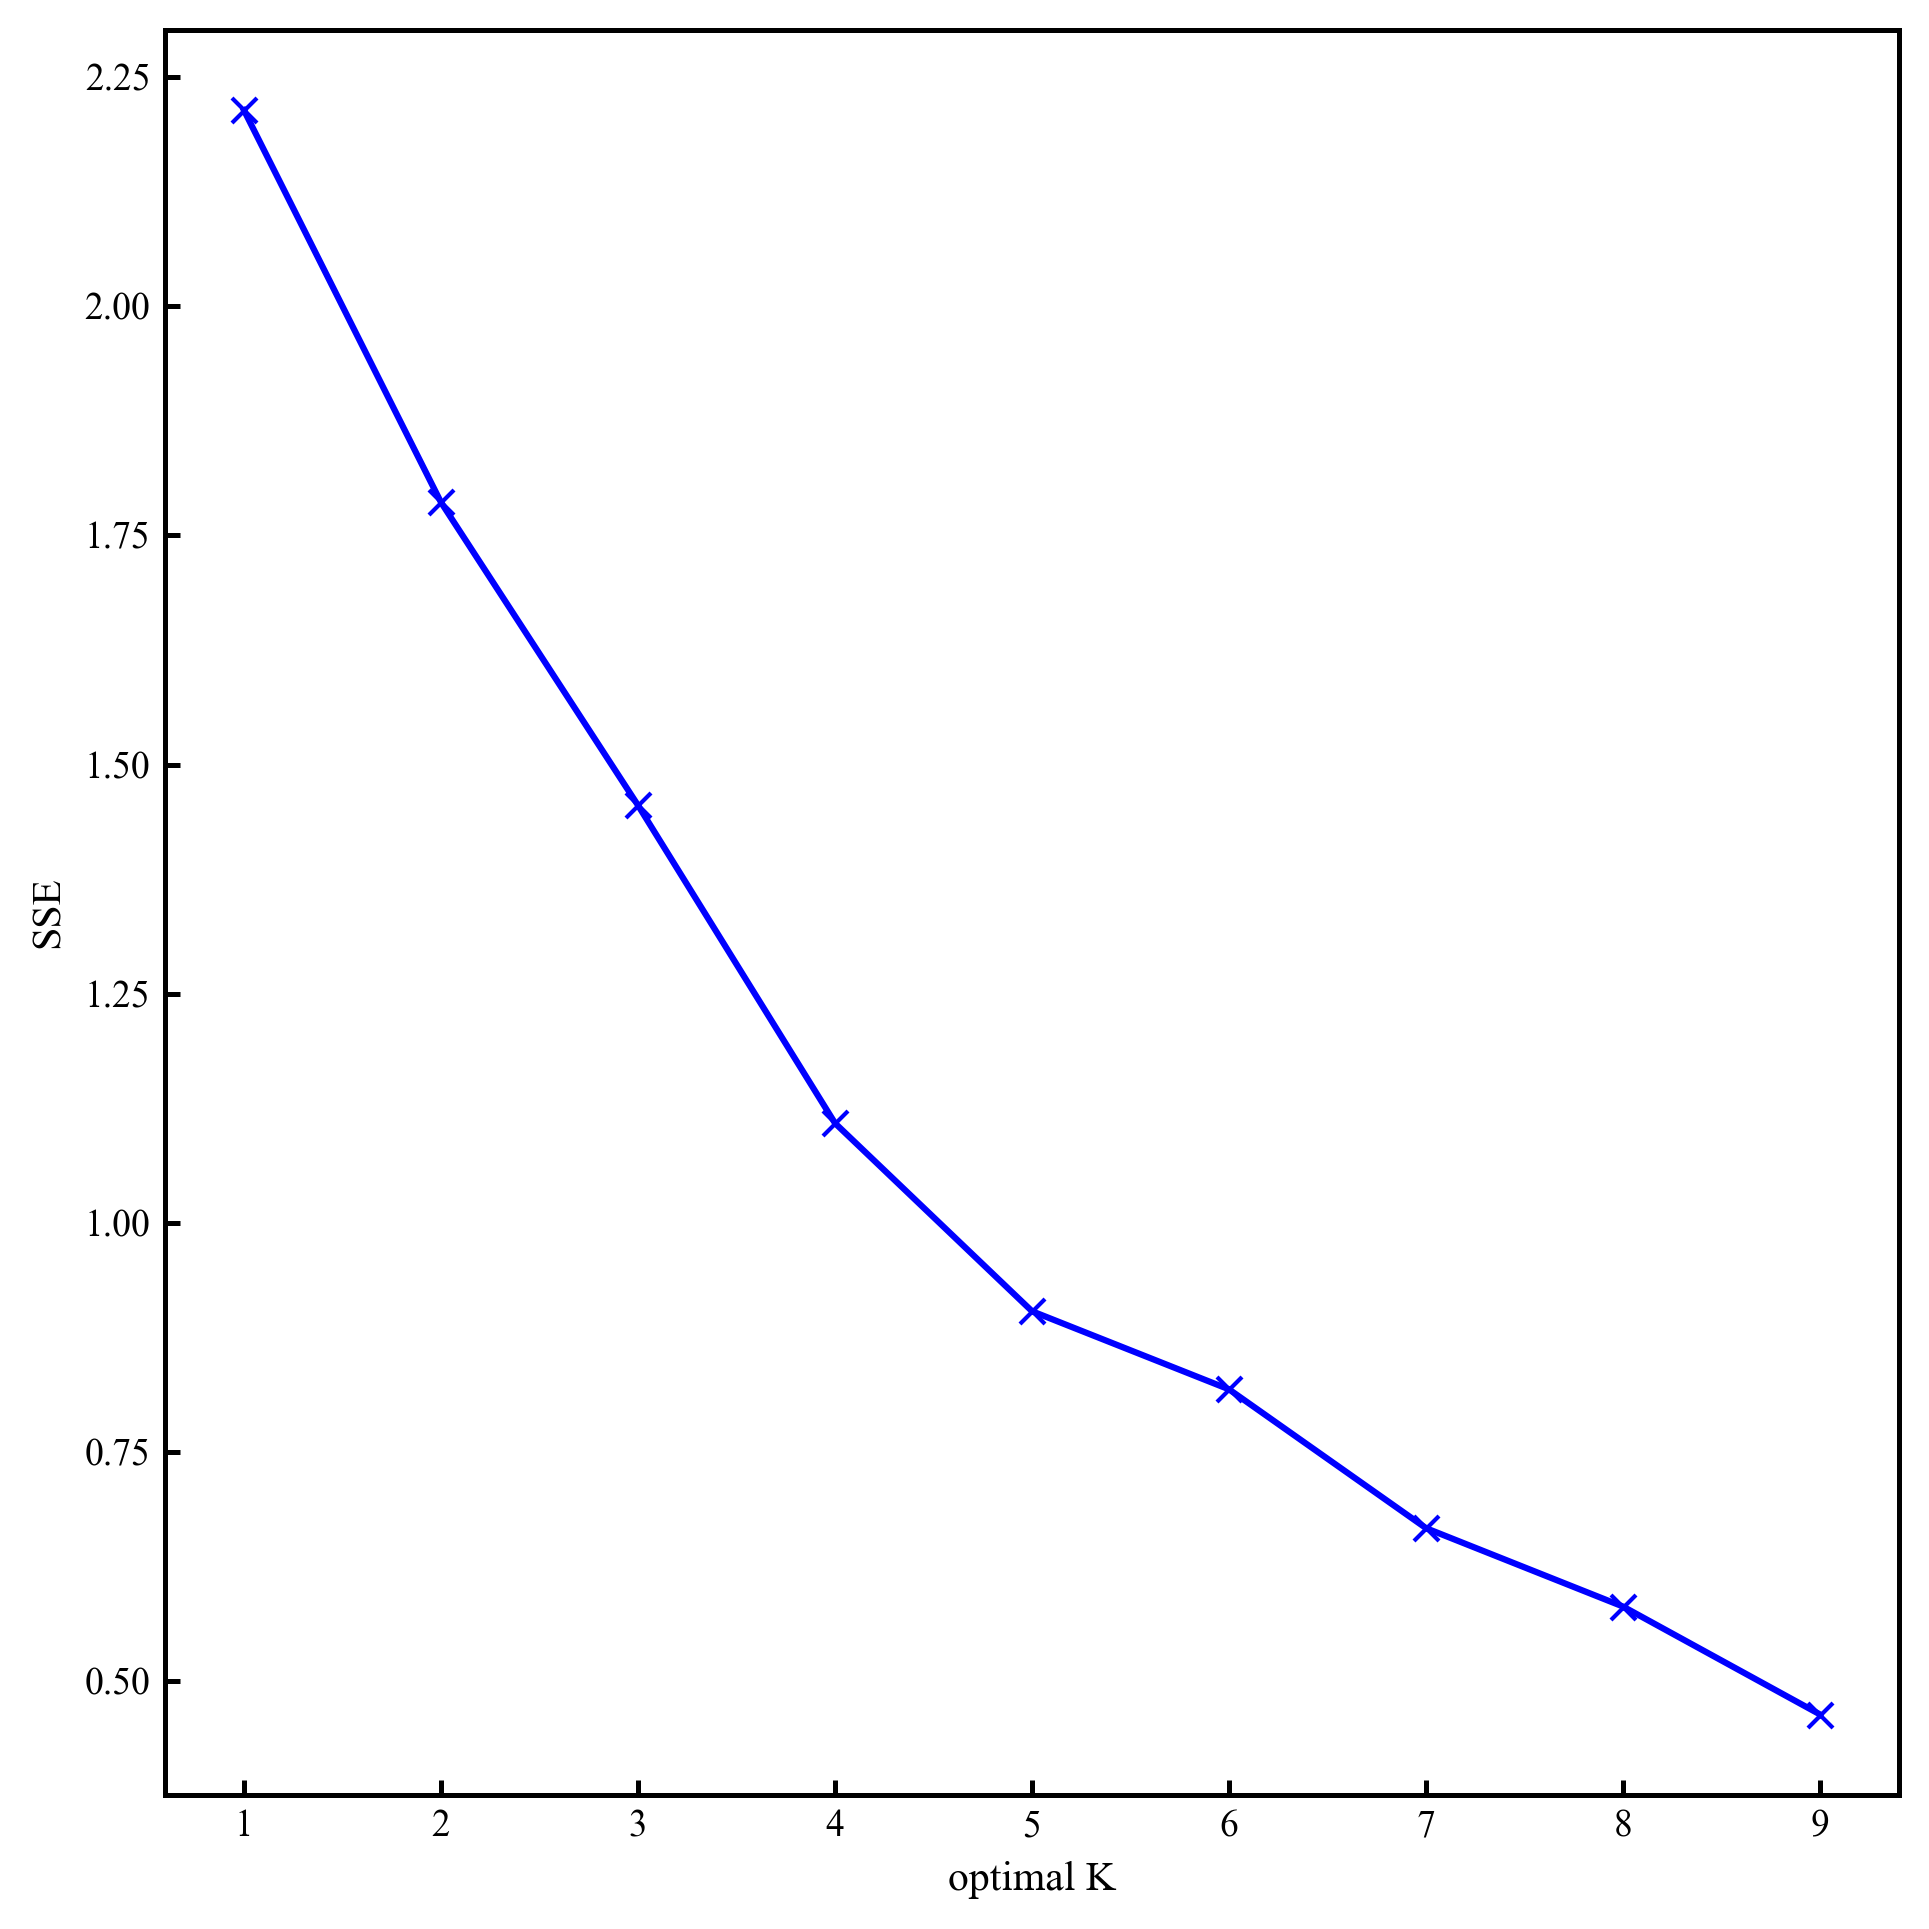

In [19]:
#生成一个字典保存每次的代价函数
distortions = []
K = range(1,10)
for k in K:
    #分别构建各种K值下的聚类器
    Model = KMeans(n_clusters=k).fit(data_scaled) 
    #计算各个样本到其所在簇类中心欧式距离(保存到各簇类中心的距离的最小值)
    distortions.append(sum(np.min(cdist(data_scaled, 
                                        Model.cluster_centers_, 
                                        'euclidean'), 
                                        axis=1)) / data_scaled.shape[0])

#绘制各个K值对应的簇内平方总和，即代价函数SSE
plt.plot(K,distortions,'bx-')
#设置坐标名称
plt.xlabel('optimal K')
plt.ylabel('SSE')
plt.show()

In [20]:
# 初始化 KMeans 模型，设定 n_clusters=3（因为 Iris 数据集有三个类别）
kmeans = KMeans(n_clusters=5)

In [21]:
# 训练模型
Kmeans_model = kmeans.fit(data_scaled)
predict_ = Kmeans_model.fit_predict(data_scaled)
score = silhouette_score(data_scaled, predict_)
print(predict_)

[4 0 3 3 3 0 2 1 4 1 1 2 2 2 0 3]


In [28]:
# 获取每个样本的聚类标签
labels = kmeans.labels_
label_name = data.columns
# 获取各簇的质心
centers = kmeans.cluster_centers_

In [58]:
# 取出每个簇中的样本
cluster_0 = label_name[labels == 0]
cluster_1 = label_name[labels == 1]
cluster_2 = label_name[labels == 2]
cluster_3 = label_name[labels == 3]
cluster_4 = label_name[labels == 4]

print(f"类别1:{','.join(cluster_0)}\n类别2:{','.join(cluster_1)}\n类别3:{','.join(cluster_2)}\n类别4:{','.join(cluster_3)}\n类别5:{','.join(cluster_4)}")

类别1:天津,辽宁,山东
类别2:黑龙江,江苏,浙江
类别3:吉林,安徽,福建,江西
类别4:河北,山西,内蒙古,河南
类别5:北京,上海


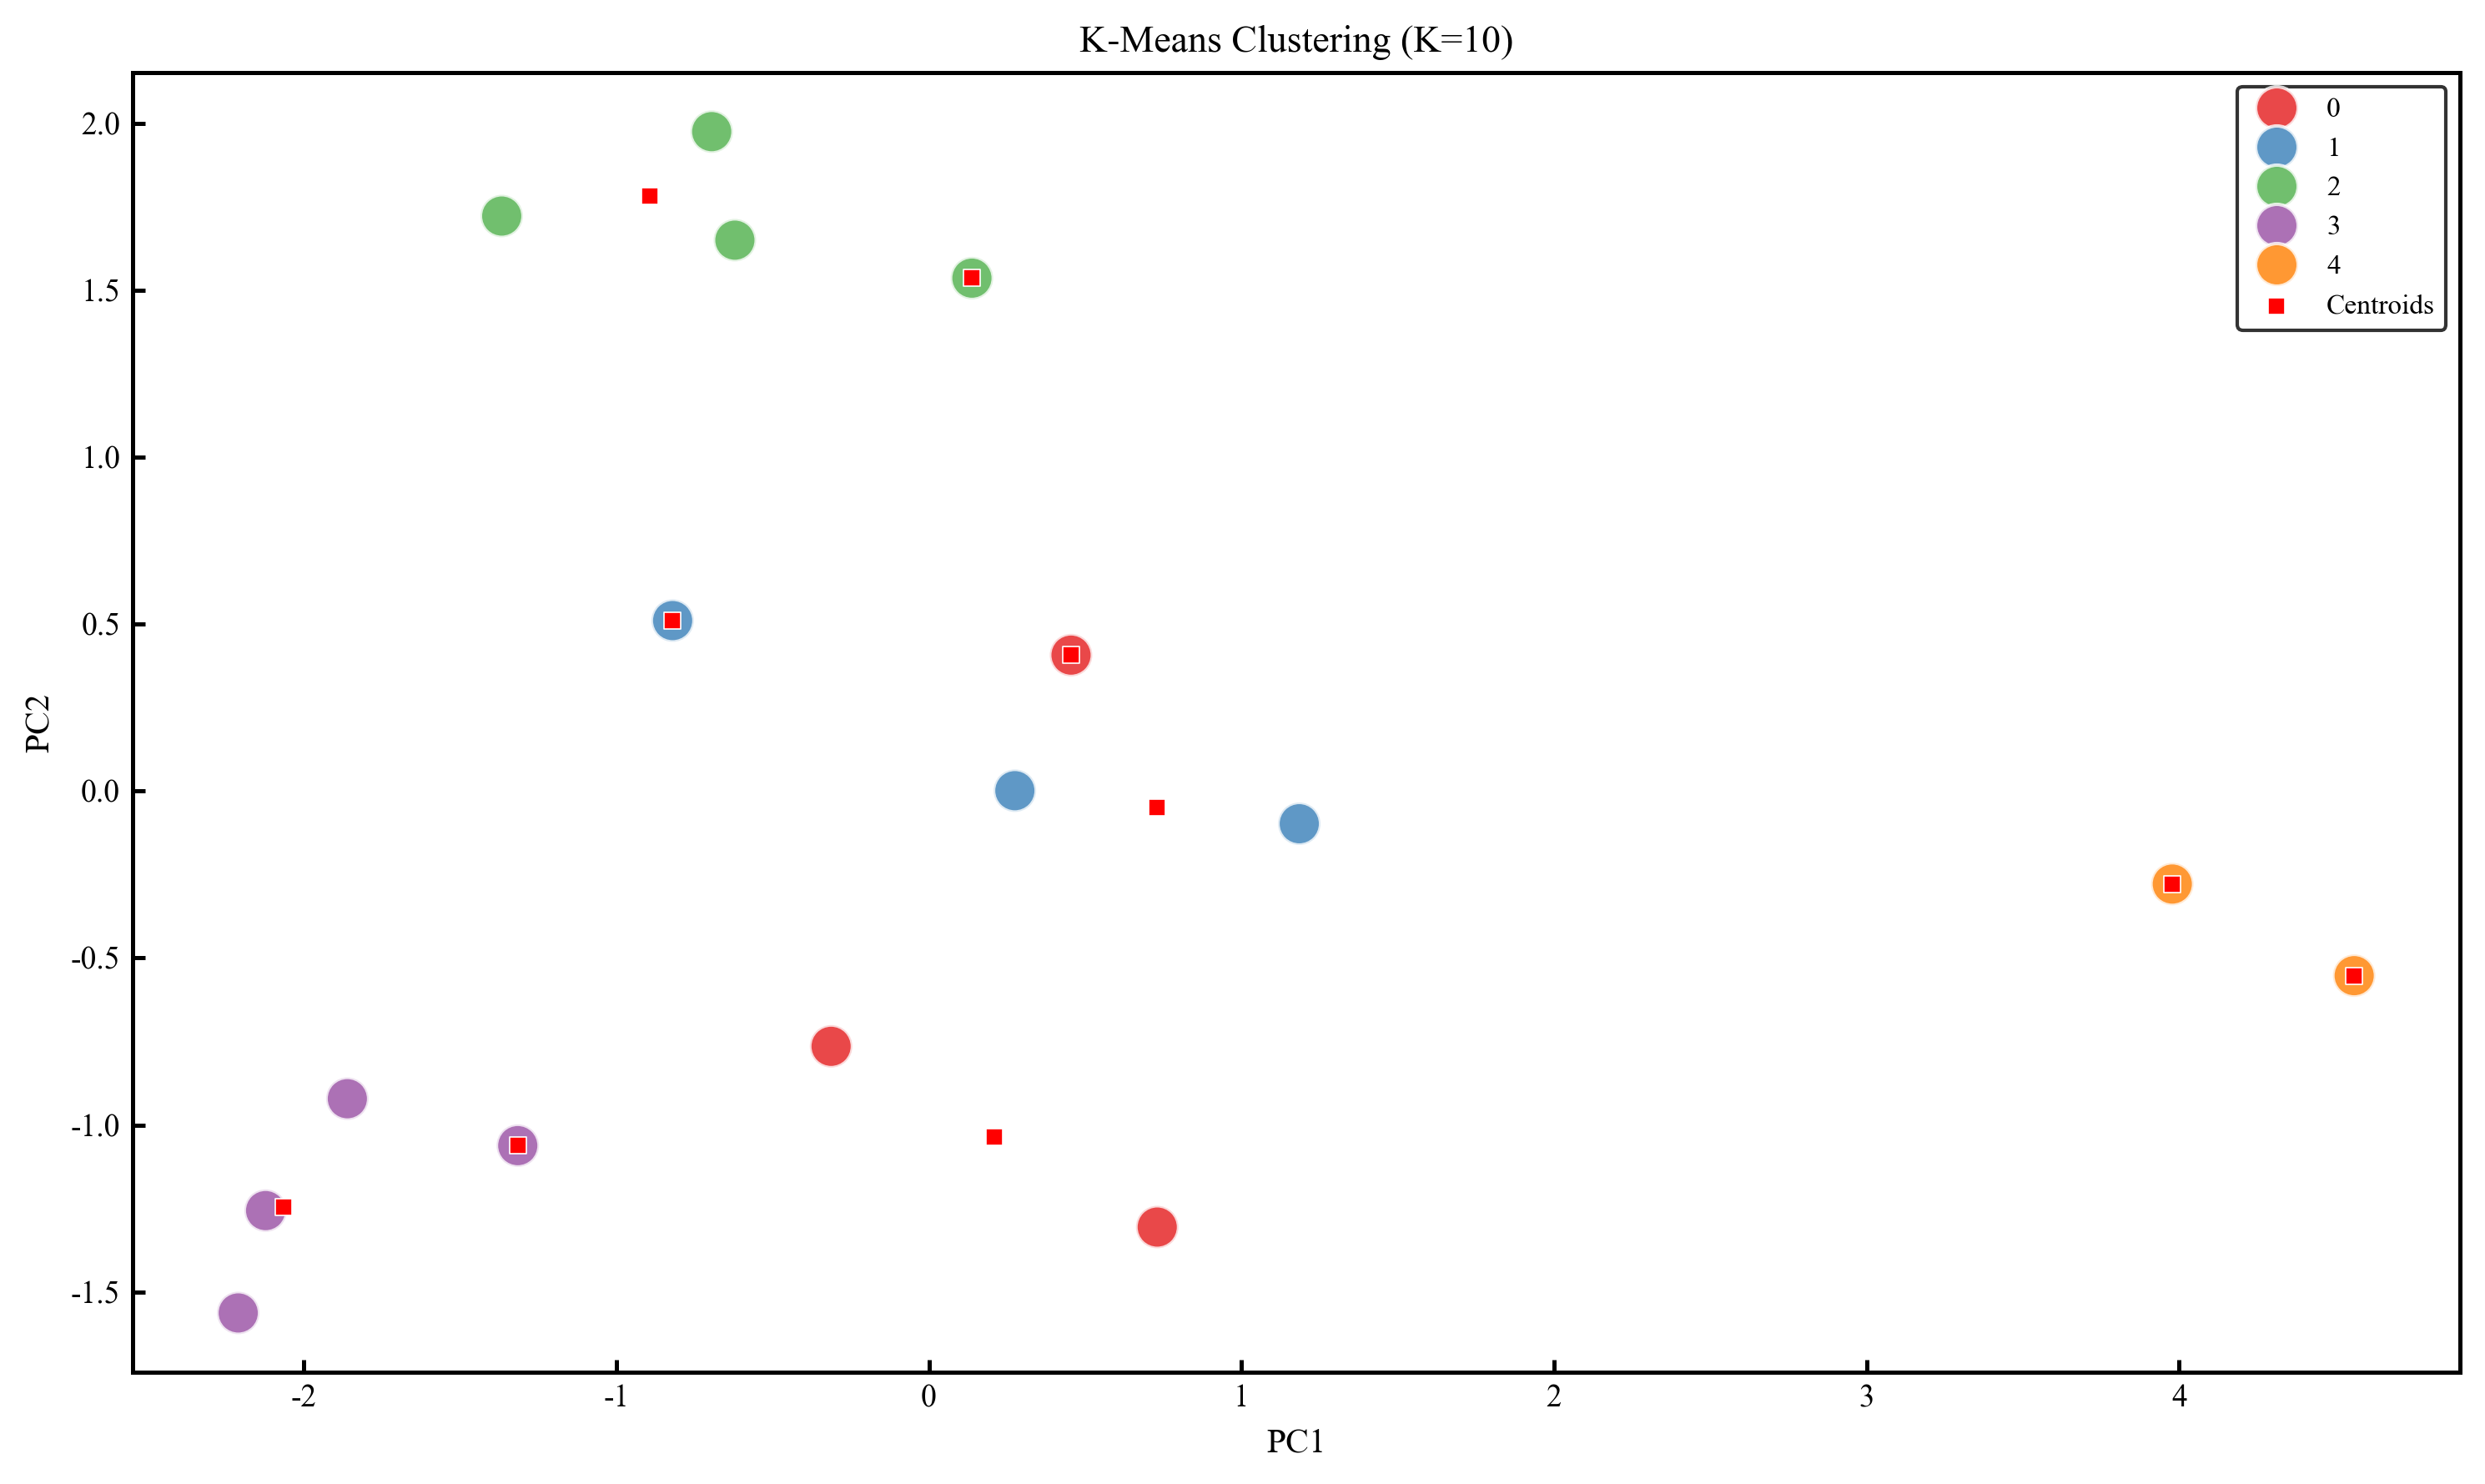

In [74]:
# 可视化（PCA降维）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
centers_pca = pca.transform(kmeans.cluster_centers_)
# 将结果合并为DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

# 绘制散点图（Seaborn）
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set1',
    data=df_pca,
    s=150,
    alpha=0.8
)

# 绘制中心点
sns.scatterplot(
    x=centers_pca[:, 0],
    y=centers_pca[:, 1],
    marker='s',
    s=25,
    color='red',
    label='Centroids'
)

plt.title(f'K-Means Clustering (K={k})')
plt.legend()
plt.show()